In [43]:
import json

def flat_unique(path='data/arxiv_metadata.json'):
    with open(path) as f:
        paper_meta = json.load(f)

    all_papers = []
    ids = []
    for papers in paper_meta.values():
        for paper in papers:
            all_papers.append(paper)
            ids.append(paper['id'])

    filled_ids = {id_: False for id_ in ids}
    all_unique_papers = []
    for paper in all_papers:
        if not filled_ids[paper['id']]:
            all_unique_papers.append(paper)
            filled_ids[paper['id']] = True
            
    return all_unique_papers

In [44]:
papers = flat_unique()
summaries = [paper['summary'].replace('\n', ' ') for paper in papers]

In [101]:
sample = summaries[10]

import gensim

def tokenize(text):
    """Removes stop words and lowers"""
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS:
            result.append(token.lower())
            
    return result

In [102]:
# Choosing not to lemmatize as most interesting words are concepts
tokenized = tokenize(sample)
#dictionary = gensim.corpora.Dictionary(tokenized)

In [103]:
print(len(np.unique(np.array(tokenized))), len(tokenized))

114 154


In [104]:
tokenized[:10]

['paper',
 'propose',
 'deep',
 'learning',
 'algorithms',
 'ranking',
 'response',
 'surfaces',
 'applications',
 'optimal']

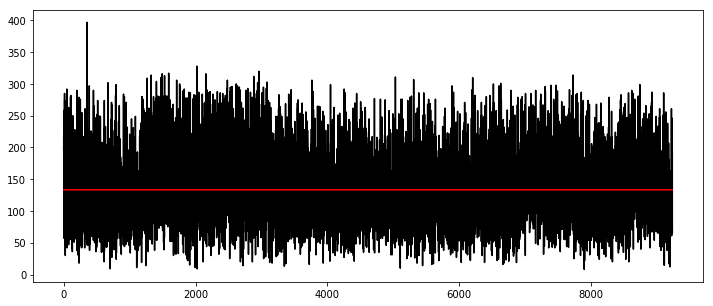

In [108]:
summary_len = [len(summary.split()) for summary in summaries]

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(summary_len, color='k')
plt.plot([np.array(summary_len).mean()]*len(summary_len), color='r')
plt.show()

# pretty solid 130 words